In [1]:
import numpy as np

## DATA ANALYSIS ON IRIS DATASET USING KNN CLASSIFIER

In [27]:
from sklearn import datasets
from sklearn import model_selection
# SINCE THE OUTPUT IS EITHER 0 ,1 OR 2 , SO THIS IS A CLASSIFICATION PROBLEM

In [7]:
iris=datasets.load_iris()

In [8]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(iris.data,iris.target)

In [9]:
from sklearn import linear_model

In [12]:
from sklearn import neighbors

In [13]:
clf=neighbors.KNeighborsClassifier()

In [14]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
clf.score(x_test,y_test)

0.9736842105263158

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test,clf.predict(x_test)))

[[10  0  0]
 [ 0 11  1]
 [ 0  0 16]]


In [24]:
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.92      0.96        12
          2       0.94      1.00      0.97        16

avg / total       0.98      0.97      0.97        38



## Now we use cross_val_score in model_selection to find the optimal value of K in KNN

In [41]:
x_axis=[]
y_axis=[]
for i in range(1,20,2):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i)
    score=model_selection.cross_val_score(clf,x_train,y_train,cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=0))
    print(i,score.mean())
    x_axis.append(i)
    y_axis.append(score.mean())

1 0.9557312252964426
3 0.9466403162055336
5 0.9553359683794467
7 0.9553359683794467
9 0.9553359683794467
11 0.9731225296442687
13 0.9640316205533598
15 0.9549407114624506
17 0.9549407114624506
19 0.9553359683794467


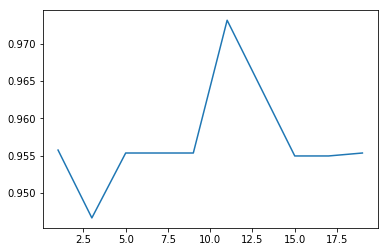

None


In [43]:
# Now visualize this
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
print(plt.show())